### Scenario 1: 
The National Football League (NFL) records a variety of performance data for individuals and
teams. To investigate the importance of passing on the percentage of games won by a team,
the following data show the conference (Conf), an average number of passing yards per
attempt (Yds/Att), the number of interceptions thrown per attempt (Int/Att), and the percentage
of games won (Win%) for a random sample of 16 NFL teams for the 2011 season (NFL web
site).

### 1.3.1 Developing the Estimated Multiple Linear Regression Equation
Develop the estimated regression equation that could be used to predict the percentage of games won, given the average number of passing yards per attempt and the number of interceptions thrown per attempt. What percentage of variation in the sample values of the percentage of games won does this model explain?

In [1]:
# Increase Jupyter display cell-width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
# Import standard libraries
import numpy as np
import pandas as pd
import statsmodels as sm
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
NFLPassing = pd.read_csv('data/NFLPassing.csv', index_col=0)
NFLPassing['intercept'] = 1
lm_passing3 = sm.OLS(NFLPassing['Win_Pct'], NFLPassing[['Yds_Att', 'Int_Att', 'intercept']]).fit()
print(lm_passing3.summary())

                            OLS Regression Results                            
Dep. Variable:                Win_Pct   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     22.41
Date:                Sun, 13 Jun 2021   Prob (F-statistic):           4.32e-05
Time:                        05:56:16   Log-Likelihood:                -64.918
No. Observations:                  17   AIC:                             135.8
Df Residuals:                      14   BIC:                             138.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Yds_Att       12.9495      3.060      4.232      0.0

C:\Users\vreed\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


### 1.3.2 Developing the Estimated Simple Linear Regression Equation

Develop the estimated regression equation that could be used to predict the percentage of
games won, given the number of interceptions thrown per attempt. What percentage of
variation in the sample values of the percentage of games won does this model explain?

In [4]:
# Predictor variable -> Interceptions
lm_passing2 = sm.OLS(NFLPassing['Win_Pct'], NFLPassing[['Int_Att', 'intercept']]).fit()
print(lm_passing2.summary())

                            OLS Regression Results                            
Dep. Variable:                Win_Pct   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     12.65
Date:                Sun, 13 Jun 2021   Prob (F-statistic):            0.00287
Time:                        05:56:16   Log-Likelihood:                -71.921
No. Observations:                  17   AIC:                             147.8
Df Residuals:                      15   BIC:                             149.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Int_Att    -1625.4170    457.011     -3.557      0.0

### 1.3.3 Developing the Estimated Simple Linear Regression Equation
Develop the estimated regression equation that could be used to predict the percentage of
games won, given the average number of passing yards per attempt. What proportion of
variation in the sample values of the percentage of games won does this model explain?

In [5]:
# Predictor variable -> Yards attempted
lm_passing = sm.OLS(NFLPassing['Win_Pct'], NFLPassing[['Yds_Att', 'intercept']]).fit()
print(lm_passing.summary())

                            OLS Regression Results                            
Dep. Variable:                Win_Pct   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     21.38
Date:                Sun, 13 Jun 2021   Prob (F-statistic):           0.000331
Time:                        05:56:16   Log-Likelihood:                -69.589
No. Observations:                  17   AIC:                             143.2
Df Residuals:                      15   BIC:                             144.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Yds_Att       16.6541      3.602      4.624      0.0

### 1.3.4 Using the Estimated Regression

The average number of passing yards per attempt for the Kansas City Chiefs during the 2011
season was 6.2, and the team's number of interceptions thrown per attempt was 0.036. Use the
estimated regression equation developed in the previous part to predict the percentage of
games won by the Kansas City Chiefs during the 2011 season. Compare your prediction to the
actual percentage of games won by the Kansas City Chiefs. (Note: for the 2011 season the
Kansas City Chiefs record was seven wins and nine losses.) Did the estimated regression
equation that uses only the average number of passing yards per attempt as the independent
variable to predict the percentage of games won provide a good fit?

In [6]:
# Using the estimated regression equation developed in 1.3, the predicted percentage of games
# won by the Kansas City Chiefs for the 2011 season (during which the Kansas City Chiefs
# average number of passing yards per attempt was 6.2 and the number of interceptions thrown
# per attempt was 0.036) is
# Y' = -5.763 + 12.949(6.2) - 1083.788(0.036) = 35.5064 or 35.51%.
# During the 2011 season, the Kansas City Chiefs won 43.75% of its games (recall the team's
# record for the 2011 season was 7 wins and 9 loses, and so the team performed better than
# what we would predict for a team with an average number of passing yards per attempt of 6.2
# and number of interceptions thrown per attempt of 0.036).

# The estimated simple linear regression equation that uses only the average number of passing
# yards per attempt as the independent variable to predict the percentage of games won has a
# coefficient of determination of R2 = 0.5771, and the estimated multiple linear regression
# equation that uses both the average number of passing yards per attempt and the number of
# interceptions thrown per attempt as the independent variable to predict the percentage of
# games won has a coefficient of determination of R2 = 0.7525. The multiple linear regression
# model fits the data better, as it explains over 17% more variation in the percentage of games
# won than did the simple linear regression.

"""Y = B0 + B1X1 - B2X2)
where: Y or Win_Pct = ?
       B0 = -5.763
       X1 or Yds_Att = 6.2 
       X2 or Int_Att = 0.036
       """
print(-5.763 + 12.949 * 6.2 - 1083.788 * 0.036)

35.504431999999994


### Scenario 2

Johnson Filtration, Inc. provides maintenance service for water filtration systems throughout
southern Florida. Customers contact Johnson with requests for maintenance service on their
water filtration systems period to estimate the service time and the service calls. Johnson's
managers want to predict the repair time necessary for each maintenance request. Hence,
repair time in hours is the dependent variable. Repair time is believed to be related to three
factors: the number of months since the last maintenance service, the type of repair problem
(mechanical or electrical), and the repair person who performs the repair (Donna Newton or
Bob Jones). Data for a sample of 10 service calls are reported in the following data file.

### 2.3.1 Testing the Hypotheses of No Relationship Between Repair Time and the Number of Months

Before testing the hypotheses of no relationship between repair time and the number of months
since the last maintenance service, check the conditions necessary for valid inference in
regression. If valid, what is the interpretation of this relationship? What does the coefficient of
determination tell you about this model?
<br> (Hint: you can use seaborn.scatterplot to graph the comparison of the predictor to the residuals.
The residuals should be calculated first from the previous regression model.)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


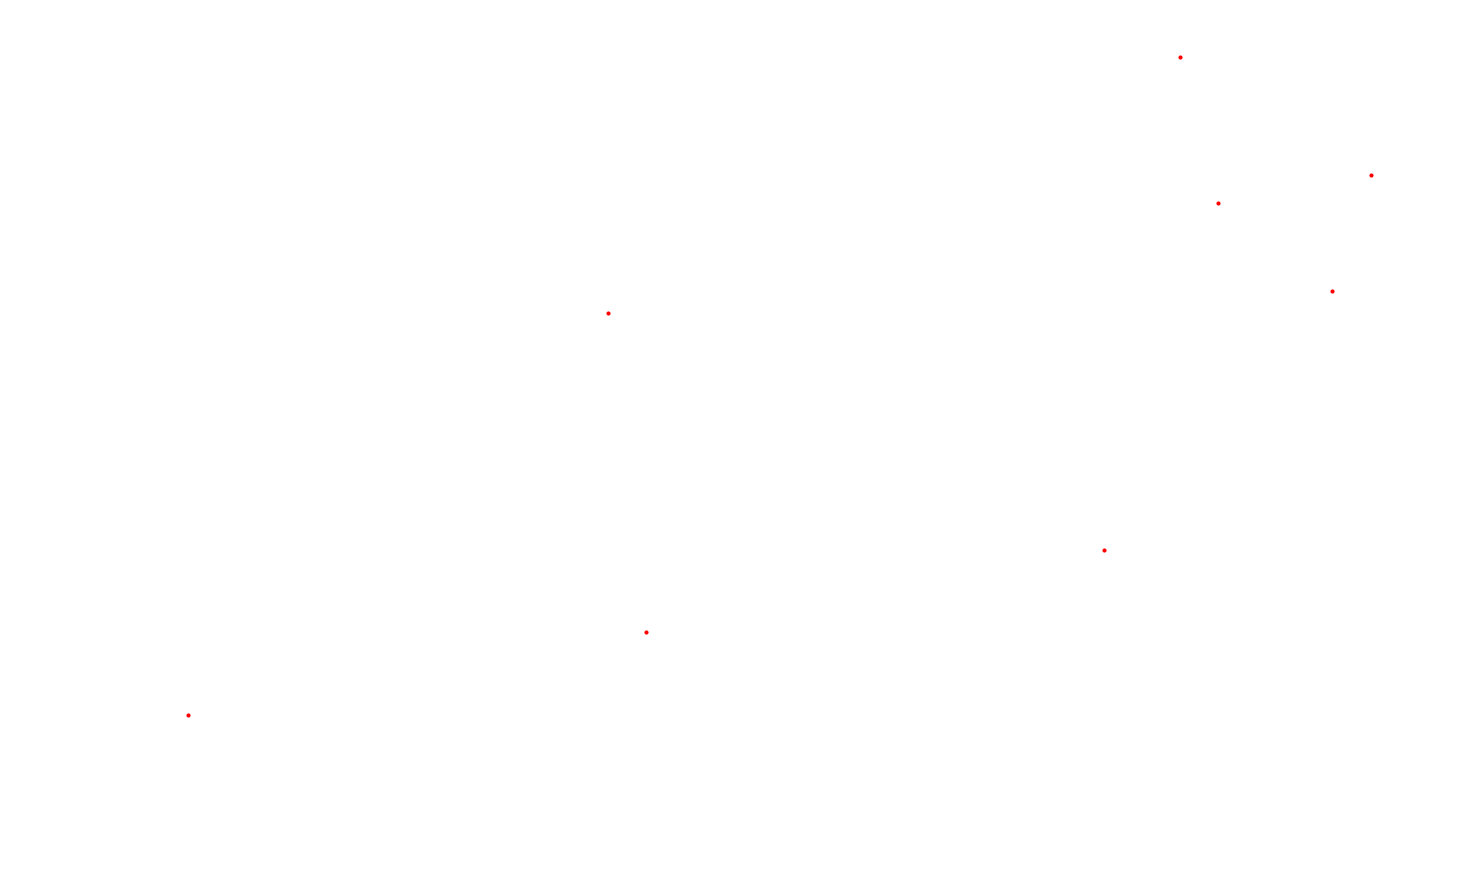

In [7]:
"""
Y = B0 + B1X1 + B2X2 + B3X3
where:  Y or repair time in hours = ?
        B0 or y-intercept = 1
        X1 = # of months since last maintenance service
        X2 = type of repair problem (mechanical or electrical)
        X3 = person who performs repair (Donna Newton or Bob Jones)
"""

# Because we are working with only 10 observations, assessing the conditions necessary for
# inference to be valid in regression is extremely difficult. However, this scatter chart does not
# provide strong evidence of a violation of the conditions, so we will proceed with our inference.
# Since the level of significance for use in hypothesis testing has not been given, we will use the
# standard 0.05 level throughout this problem.
# The p-value associated with the estimated regression parameter b1 is 0.0163. Because this pvalue is less than the 0.05 level of significance, we reject the hypothesis that b1 = 0. We
# conclude that there is a relationship between repair time and the number of months since the
# last maintenance service at the 0.05 level of significance, and our best estimate is that a onemonth increase in the number of months since the last maintenance service corresponds to an
# increase of 0.3041 hours in repair time.
# The coefficient of determination R2 is 0.5342, so the regression model explains approximately
# 53% of the variation in the values of repair time in the sample

Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
lm_Repair = sm.OLS(Repair['Repair_time'], Repair[['Months_Last', 'intercept']]).fit()
residuals = Repair['Repair_time'] - lm_Repair.predict(Repair[['Months_Last', 'intercept']])
sns.scatterplot(x=Repair['Repair_time'], y=residuals, color='red')
plt.show();

### 2.3.2 Developing the Simple Linear Regression Equation
Develop the simple linear regression equation to predict repair time given the number of
months since the last maintenance service, and use the results to test the hypothesis that no
relationship exists between repair time and the number of months since the last maintenance
service at the 0.05 level of significance. What is the interpretation of this relationship? What
does the coefficient of determination tell you about this model?

In [8]:
Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
lm_Repair = sm.OLS(Repair['Repair_time'], Repair[['Months_Last', 'intercept']]).fit()
print(lm_Repair.summary())

                            OLS Regression Results                            
Dep. Variable:            Repair_time   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     9.174
Date:                Sun, 13 Jun 2021   Prob (F-statistic):             0.0163
Time:                        05:56:17   Log-Likelihood:                -10.602
No. Observations:                  10   AIC:                             25.20
Df Residuals:                       8   BIC:                             25.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Months_Last     0.3041      0.100      3.029      

C:\Users\vreed\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


### The estimated simple linear regression equation is Y' = 2.1473 + 0.3041(Months_Last)

### 2.3.3 Calculating the Predicted Repair Time & Residual
Using the simple linear regression model developed in the previous part, calculate the predicted
repair time and residual for each of the 10 repairs in the data. Sort the data in ascending order
by the value of the residual. Do you see any pattern in the residuals for the two types of
repairs? Do you see any pattern in the residuals for the two repairpersons? Do these results
suggest any potential modifications to your simple linear regression model? Now create a
scatter chart with months since the last service on the X-axis and repair time and hours on the
Y-axis for which the points representing electrical and mechanical repairs are shown in different
shapes and or colors. Create a similar scatterplot of months since last service and repair time in
hours for which the points representing repairs by Bob Jones or Donna Newton are shown in
different shapes and colors. Do these charts and the results of your residual analysis suggest
the same potential modification to your simple linear regression model?

In [9]:
Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
lm_Repair = sm.OLS(Repair['Repair_time'], Repair[['Months_Last', 'intercept']]).fit()
residuals = Repair['Repair_time'] - lm_Repair.predict(Repair[['Months_Last', 'intercept']])
Repair['predicted'] = lm_Repair.predict(Repair[['Months_Last', 'intercept']])
Repair['residuals'] = residuals
print(Repair.sort_values('residuals'))

   Repair_time  Months_Last Type_repair  Repairperson  intercept  predicted  \
3          1.8            3  Mechanical  Donna Newton          1   3.059669   
1          3.0            6  Mechanical  Donna Newton          1   3.972066   
6          4.2            9  Mechanical     Bob Jones          1   4.884463   
0          2.9            2  Electrical  Donna Newton          1   2.755537   
4          2.9            2  Electrical  Donna Newton          1   2.755537   
2          4.8            8  Electrical     Bob Jones          1   4.580331   
7          4.8            8  Mechanical     Bob Jones          1   4.580331   
9          4.5            6  Electrical  Donna Newton          1   3.972066   
5          4.9            7  Electrical     Bob Jones          1   4.276198   
8          4.4            4  Electrical     Bob Jones          1   3.363802   

   residuals  
3  -1.259669  
1  -0.972066  
6  -0.684463  
0   0.144463  
4   0.144463  
2   0.219669  
7   0.219669  
9   0.5279

### 2.3.4 Constructing a Scatterplot of Months
Construct a scatterplot of months since last service and repair time in hours. In addition,
construct the plot for which the points representing electrical and mechanical repairs are shown
with different shapes and colors.

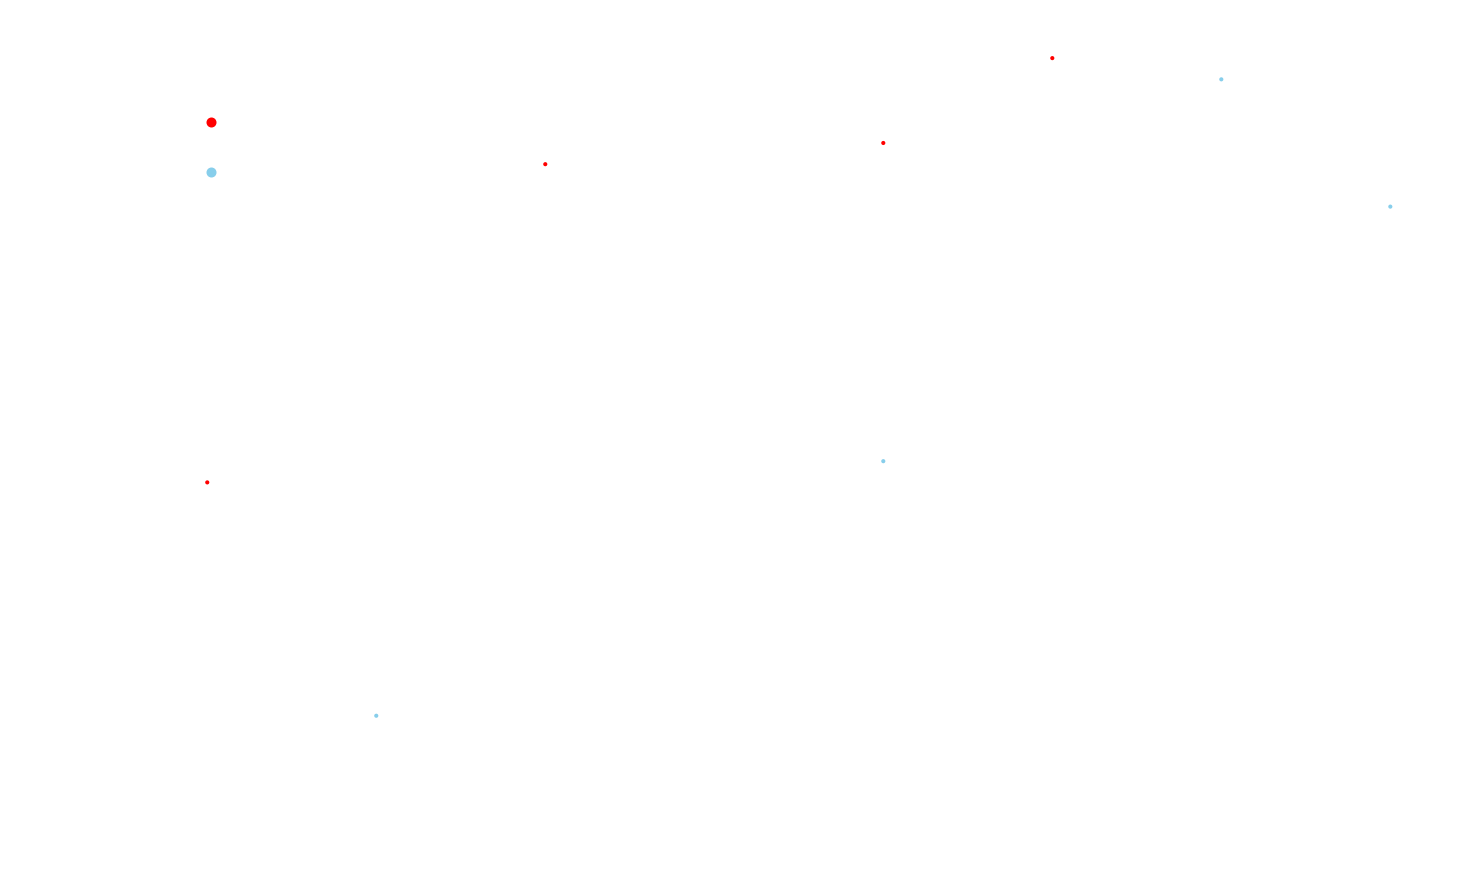

In [10]:
Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
lm_Repair = sm.OLS(Repair['Repair_time'], Repair[['Months_Last', 'intercept']]).fit()
sns.scatterplot(x = 'Months_Last', y = 'Repair_time', data=Repair, hue = 'Type_repair', palette = ['red', 'skyblue'])
plt.show();